In [96]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import TargetEncoder

In [122]:
data = pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [129]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [98]:
data.groupby('Embarked')['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

In [156]:
data['Embarked'] = data['Embarked'].replace({'C' : 93 / (93 + 75), 'Q': 30 / (30 + 47), 'S': 217 / (427 + 217)})
data['Sex'] = data['Sex'].replace({'male': 1, 'female': 0})
m = round(data['Age'].mean())
data['Age'] = data['Age'].fillna(m)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mean())
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.336957
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.336957
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.336957
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.336957
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,0.336957
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,0.336957
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,30.0,1,2,W./C. 6607,23.4500,NaN,0.336957
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0.553571


In [157]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [158]:
data_int = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
data_int.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [159]:
data_int.info

<bound method DataFrame.info of      Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         3    1  22.0      1      0   7.2500  0.336957
1         1    0  38.0      1      0  71.2833  0.553571
2         3    0  26.0      0      0   7.9250  0.336957
3         1    0  35.0      1      0  53.1000  0.336957
4         3    1  35.0      0      0   8.0500  0.336957
..      ...  ...   ...    ...    ...      ...       ...
886       2    1  27.0      0      0  13.0000  0.336957
887       1    0  19.0      0      0  30.0000  0.336957
888       3    0  30.0      1      2  23.4500  0.336957
889       1    1  26.0      0      0  30.0000  0.553571
890       3    1  32.0      0      0   7.7500  0.389610

[891 rows x 7 columns]>

In [160]:
scaler = MinMaxScaler()
scaler.fit(data_int)
data_int = scaler.transform(data_int)
data_int

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.01415106,
        0.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 0.13913574,
        1.        ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.01546857,
        0.        ],
       ...,
       [1.        , 0.        , 0.37170143, ..., 0.33333333, 0.04577135,
        0.        ],
       [0.        , 1.        , 0.32143755, ..., 0.        , 0.0585561 ,
        1.        ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 0.01512699,
        0.24307592]])

<Axes: xlabel='Pclass'>

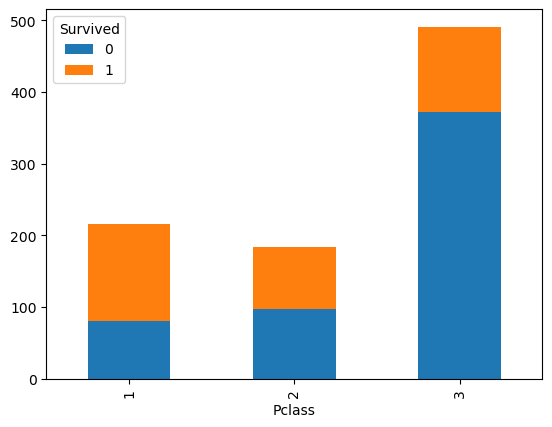

In [161]:
data.groupby('Pclass')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Sex'>

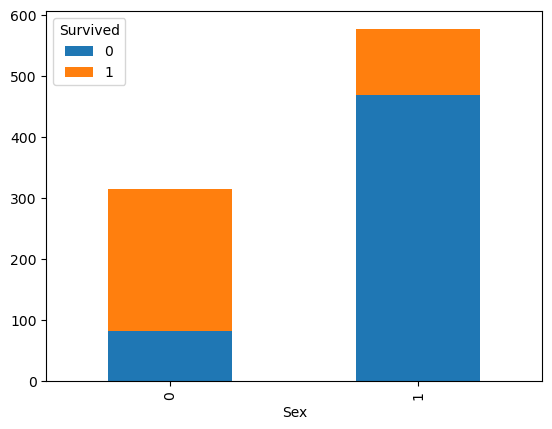

In [162]:
data.groupby('Sex')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Age'>

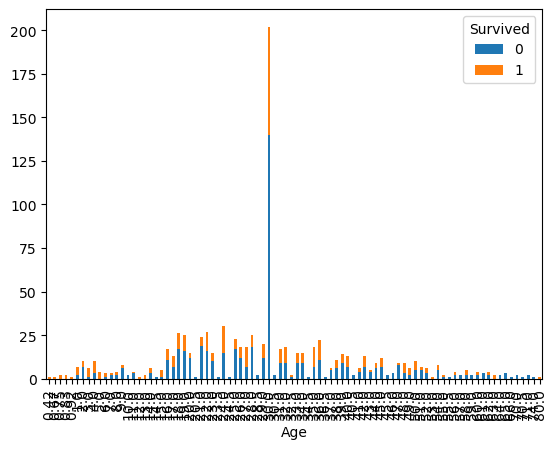

In [163]:
data.groupby('Age')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='SibSp'>

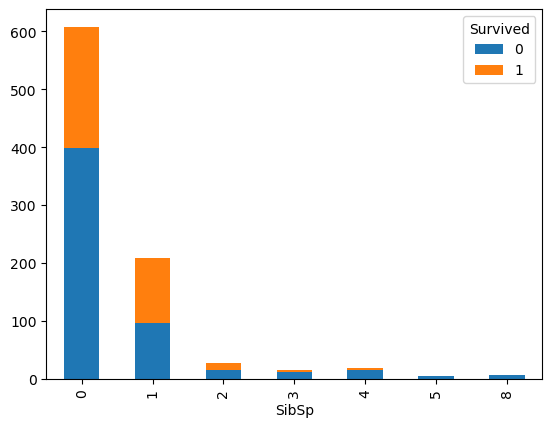

In [164]:
data.groupby('SibSp')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Parch'>

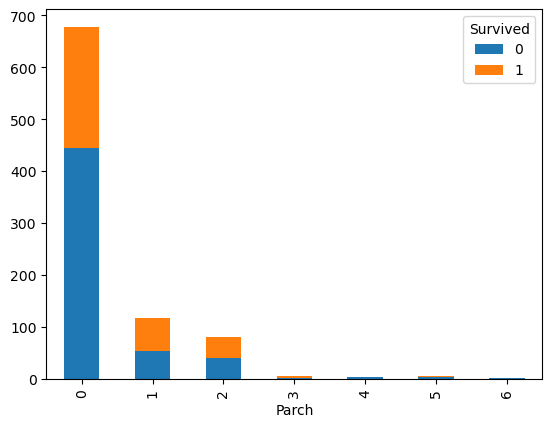

In [165]:
data.groupby('Parch')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Fare'>

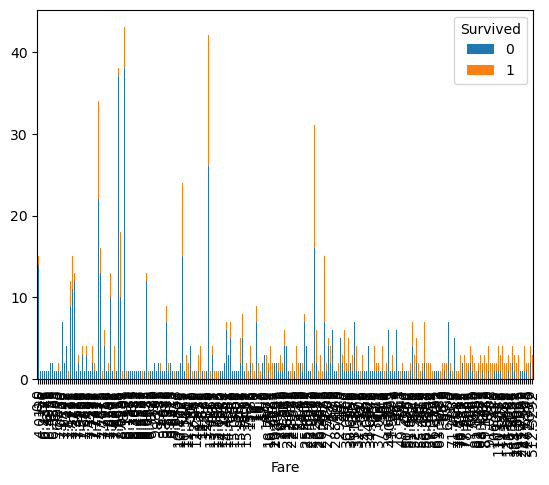

In [166]:
data.groupby('Fare')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Cabin'>

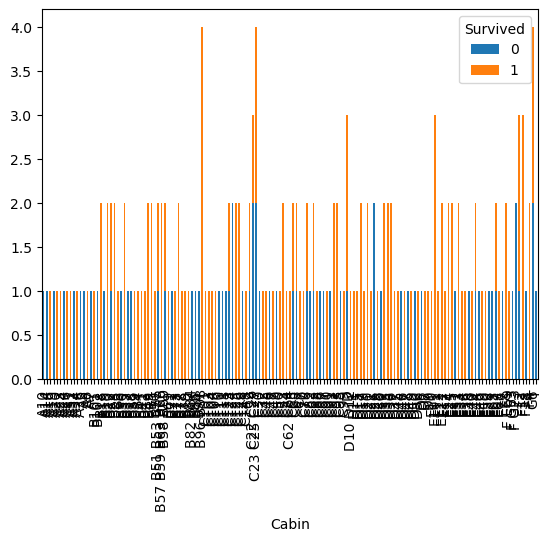

In [167]:
data.groupby('Cabin')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)

<Axes: xlabel='Embarked'>

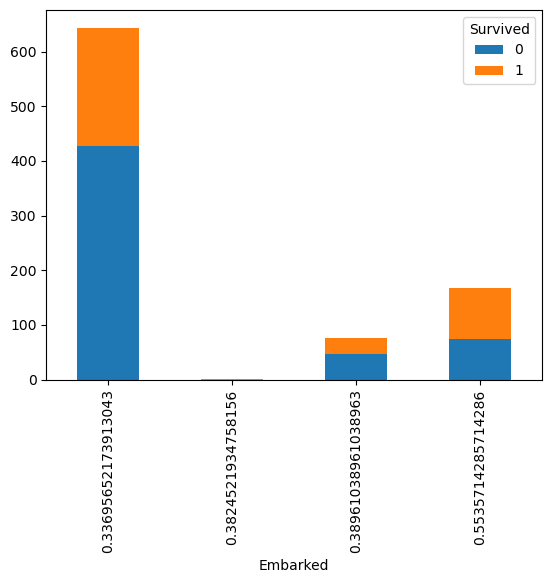

In [168]:
data.groupby('Embarked')['Survived'].value_counts().unstack().plot(kind='bar', stacked=True)

In [169]:
data_int.is

SyntaxError: invalid syntax (395649082.py, line 1)

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [242]:
grid_searcher = GridSearchCV(RandomForestClassifier(),
            param_grid={'n_estimators': [i for i in range(1, 100)]},
            cv=5)

In [243]:
grid_searcher.fit(data_int, data['Survived'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [244]:
grid_searcher.best_params_

{'n_estimators': 45}

In [245]:
test = pd.read_csv('test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [246]:
def data_transform(data):
    data['Embarked'] = data['Embarked'].replace({'C' : 93 / (93 + 75), 'Q': 30 / (30 + 47), 'S': 217 / (427 + 217)})
    data['Sex'] = data['Sex'].replace({'male': 1, 'female': 0})
    m = round(data['Age'].mean())
    data['Age'] = data['Age'].fillna(m)
    data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mean())
    data['Fare'] = data['Fare'].fillna(data['Fare'].mean())
    data_int = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
    scaler = MinMaxScaler()
    scaler.fit(data_int)
    data_int = scaler.transform(data_int)
    return data_int

In [247]:
test1 = data_transform(test)
test1

array([[1.        , 1.        , 0.4527232 , ..., 0.        , 0.01528158,
        0.24307592],
       [1.        , 0.        , 0.61756561, ..., 0.        , 0.01366309,
        0.        ],
       [0.5       , 1.        , 0.8153765 , ..., 0.        , 0.01890874,
        0.24307592],
       ...,
       [1.        , 1.        , 0.50547277, ..., 0.        , 0.01415106,
        0.        ],
       [1.        , 1.        , 0.39337993, ..., 0.        , 0.01571255,
        0.        ],
       [1.        , 1.        , 0.39337993, ..., 0.11111111, 0.0436405 ,
        1.        ]])

In [250]:
ans = pd.Series(grid_searcher.predict(test1))
ans

0      0
1      0
2      0
3      0
4      0
      ..
413    1
414    1
415    0
416    1
417    1
Length: 418, dtype: int64

In [251]:
one = test['PassengerId'].to_frame(name='PassengerId')
two = ans.to_frame(name='Survived')

In [252]:
one

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [253]:
two

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,1
414,1
415,0
416,1


In [254]:
answ = pd.concat([one, two], axis=1)
#answ = answ[['PassengerId', 'Survived']]
answ

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [255]:
answ.to_csv('sub1.csv', index=False)

In [256]:
a = pd.read_csv('sub1.csv')
a

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [257]:
b = pd.read_csv('gender_submission.csv')
b

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
